## 知識情報学第5回演習サンプルプログラム ex5.ipynb
- Programmed by Nattapong Thammasan, 監修　福井健一
- Last updated: 2017/11/02
- Checked with Python 3.8.8, scikit-learn 1.0
- MIT Lisence

## ロジスティック回帰による手書き文字認識
- MNISTデータセットについては，詳しくは下記を参照
- http://yann.lecun.com/exdb/mnist/

In [1]:
%matplotlib inline
import os
import struct
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

### MNISTデータの読み込み関数

In [2]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

### MNISTデータの読み込み

In [3]:
current_path = os.path.dirname(os.path.realpath('__file__')) + '/data/'

In [4]:
X_train, y_train = load_mnist(current_path, kind='train')
X_test, y_test = load_mnist(current_path, kind='t10k')

In [5]:
# 学習用に最初の1000点，テスト用に最初の1000点のデータを使用
# 動作が遅い場合は，学習データを小さくして下さい
X_train = X_train[:1000][:]
y_train = y_train[:1000][:]
X_test = X_test[:1000][:]
y_test = y_test[:1000][:]
print('#data: %d, #feature: %d (training data)' % (X_train.shape[0], X_train.shape[1]))
print('#data: %d, #feature: %d (test data)' % (X_test.shape[0], X_test.shape[1]))

#data: 1000, #feature: 784 (training data)
#data: 1000, #feature: 784 (test data)


### ロジスティック回帰のインスタンスの生成と学習
- 3クラス以上のマルチクラスへの対応は、multi_classで指定する。ovr(one-versus-rest)法は、1対多でクラス数分の識別器を構築し、テストデータのクラス分類は最も事後確率の高いクラスへ分類する方式。

In [6]:
lr = LogisticRegression(penalty='l2', C=1000.0, random_state=0, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, multi_class='ovr', random_state=0,
                   solver='liblinear')

### 学習データおよびテストデータに対するaccuracyの算出

In [7]:
y_train_pred = lr.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0)*100 / X_train.shape[0]
print('accuracy for training data: %.2f%%' % acc)

y_test_pred = lr.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0)*100 / X_test.shape[0]
print('accuracy for test data: %.2f%%' % acc)

accuracy for training data: 100.00%
accuracy for test data: 81.70%


### 最初の25サンプルの識別結果をプロット
t: 正解クラス，p: 識別器による推測クラス

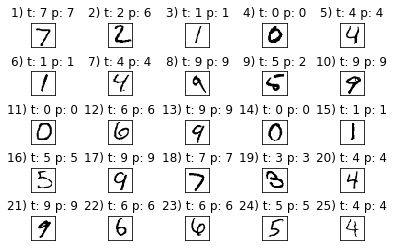

In [8]:
orign_img = X_test[:25]
true_lab = y_test[:25]
predicted_lab = y_test_pred[:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = orign_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, true_lab[i], predicted_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.subplots_adjust(hspace=1.0, wspace=2.0)
plt.show()

### パラメータを変化させてロジスティック回帰の挙動を観察する
- 【課題1a】逆正則化パラメータ（スライドのλの逆数）を10^-10から10^10まで10倍ずつ変化させたときの、非ゼロの重みの数を算出しn_nonzero_weightsに格納する。one-vs-restのいずれかの一つのクラスに対応する重みのみで良い。
- ヒント：学習済みの重みはcoef_[]に格納されている．また，非ゼロの要素数はnumpyのcount_nonzero()を使うと良い
- 【課題2】引数penaltyを変更して，L1,L2正則化の効果を考察する

## 課題1a

10クラスに対する重み全てに対しての非ゼロ要素をカウントすることとする  

In [9]:
# 重みパラメーター
Cs = [np.power(10,i-10.0) for i in range(21)]
L2_train = []
L2_test = []
L2_num_non_zero = []
L2_params = []
for C in Cs:
    lr = LogisticRegression(penalty='l2', C=C, random_state=0, solver='liblinear', multi_class='ovr')    
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    L2_params.append(lr.coef_)
    L2_train.append(np.sum(y_train == y_train_pred, axis=0)*100 / X_train.shape[0])
    L2_test.append(np.sum(y_test == y_test_pred, axis=0)*100 / X_train.shape[0])
    L2_num_non_zero.append(sum([np.count_nonzero(lr.coef_[i]) for i in range(10)]))

In [10]:
# 重みパラメーター
Cs = [np.power(10,i-10.0) for i in range(21)]
L1_train = []
L1_test = []
L1_num_non_zero = []
L1_params = []
for C in Cs:    
    lr = LogisticRegression(penalty='l1', C=C, random_state=0, solver='liblinear', multi_class='ovr')
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    L1_params.append(lr.coef_)
    L1_train.append(np.sum(y_train == y_train_pred, axis=0)*100 / X_train.shape[0])
    L1_test.append(np.sum(y_test == y_test_pred, axis=0)*100 / X_train.shape[0])
    L1_num_non_zero.append(sum([np.count_nonzero(lr.coef_[i]) for i in range(10)]))

### 分類精度のグラフ出力

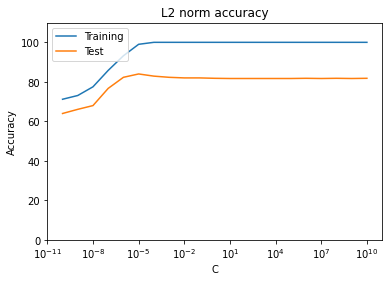

In [11]:
plt.title('L2 norm accuracy')
plt.plot(Cs, L2_train,label='Training')
plt.plot(Cs, L2_test, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.ylim((0,110))
plt.show()
#下記は実行例

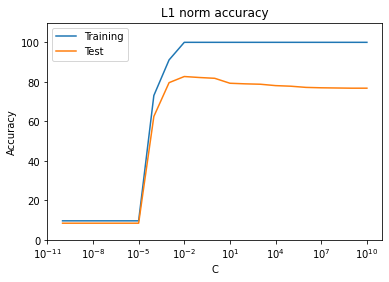

In [12]:
plt.title('L1 norm accuracy')
plt.plot(Cs, L1_train,label='Training')
plt.plot(Cs, L1_test, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.ylim(0,110)
plt.show()
#下記は実行例

L2,L1正則化どちらも正則化項が支配的になると精度が著しく落ちることが確認される．  
一方で正則化項なし(Cの値が大きい時)よりもパラメータ$C$の選び方によっては正則項がついた方が精度が良くなることが確認できる．  
このような汎化性能が良くなるような”ちょうど良い”パラメータ$\lambda$はクロスバリデーションなどで求める必要がある

### 非ゼロ重みの数のグラフ出力

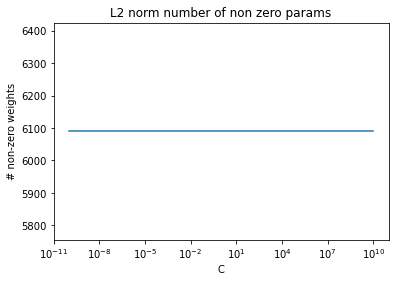

In [13]:
plt.title("L2 norm number of non zero params")
plt.plot(Cs, L2_num_non_zero)    
plt.ylabel('# non-zero weights')
plt.xlabel('C')
plt.xscale('log')
plt.show()
#下記は実行例

上のグラフよりL2正則化項の係数を変化させてもモデルパラメータの非ゼロ要素数は変化しないことがわかる

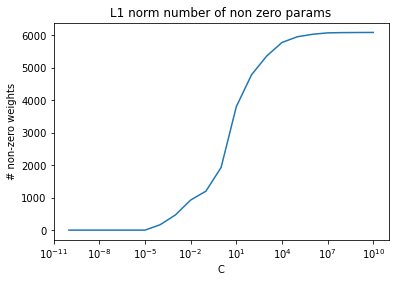

In [14]:
plt.title("L1 norm number of non zero params")
plt.plot(Cs, L1_num_non_zero)    
plt.ylabel('# non-zero weights')
plt.xlabel('C')
plt.xscale('log')
plt.show()
#下記は実行例

一方で，上図の通りL1正則化項を加えると重みの非ゼロ係数の数は$\lambda$の値の増加に伴って(Cの値の減少，つまり正則化項が支配的になるにつれて)，多くなっていることがわかる．  
一般にL1ノルム正則化項は決定変数(今回は重みパラメータ)をスパースにする効果があることが知られている

### 【課題1b】学習済み重みの2次元プロット
- いずれかひとつのクラスのみで良い

以下はL2ノルム正則化項を$C = 10^{-8}$として加えた際の学習済みの重みの可視化となっている  
ここで色の濃淡は黒いほど重みが大きい値で白いほど重みが小さい(負の値)をとっていることを表している.

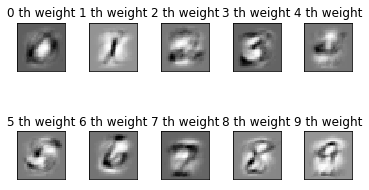

In [15]:
hfig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = L2_params[3][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title("{} th weight".format(i))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()

結果の図より予測したい数字に対する重みが黒くなっており，ある種パターンマッチングのように学習が進んだことがわかる．  
一方で正則化項の影響を弱めた$C = 10^{10}$の際の学習済の重みパラメータは以下のようになり，うっすらと数字の概形が確認できるが，上で見たようには明瞭に現れなくなることが確認できる．  
つまり，上のように極端に正則化項の影響を強めたモデルでは単純な規則によって学習がなされる一方で，正則化項の影響が少なくなると，より複雑な表現ができるモデルになっているということが示唆される．

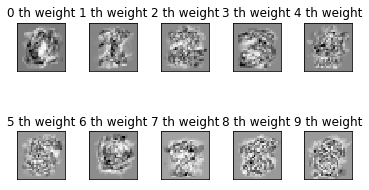

In [16]:
hfig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = L2_params[-1][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title("{} th weight".format(i))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()

続いてL1正則化項を用いた際に学習された重みの可視化をおこなっていく．  
初めに$C = 10^{-2}$と設定した際には以下のような重みとなる．  

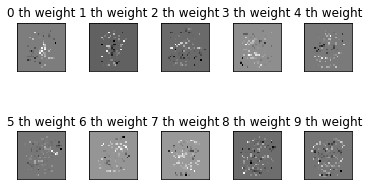

In [17]:
hfig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = L1_params[8][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title("{} th weight".format(i))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.subplots_adjust(hspace=0, wspace=0.5)
plt.show()

グラフより，明らかに上で見たようなL2正則化項を加えた場合に比べて非ゼロの成分が少なくなっていることが確認できる．  
一般に特徴量の次元が高く，特徴量がベクトルで与えられるような場合についてはL1正則化項を用いたLasso logistic回帰を用いることで結果に特に効いている特徴量を見つけることができ，モデルの解釈性を高めることができるが，今回のような画像データに対する場合では重みにを可視化しても，モデルの解釈性という観点においては特に意味を見出せないことが実験を通して分かった．  
一方でCNNや全結合のニューラルネットの枠組みでは，入力画像に対する勾配を見ることでモデルが入力画像の°の部分を根拠にして分類を行っているのかを可視化するgrad cam(https://arxiv.org/abs/1610.02391)という手法が提案されている．  
今回授業で扱ったロジスティック回帰は一層のニューラルネットで出力層としてシグモイド関数を用いたモデルとしても見なせるので(二値分類の場合，一般に多値分類の場合はsoftmax関数を用いた場合に相当)，上述のgrad camなどの可視化を用いてモデルの解釈性を高めることができると考えられる．  

## 追加考察

以下では学習されたモデルパラメータの非ゼロの個数ではなく，Cの値の変化に伴う，L2ノルムの値の変化について可視化を行う．  

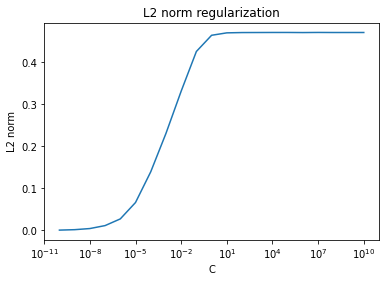

In [18]:
L2_res = [np.linalg.norm(p) for p in L2_params]

plt.title("L2 norm regularization")
plt.plot(Cs, L2_res)
plt.ylabel('L2 norm')
plt.xlabel('C')
plt.xscale('log')
plt.show()
#下記は実行例

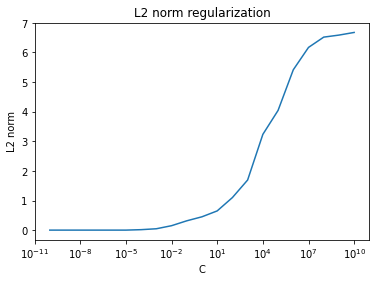

In [19]:
L1_res = [np.linalg.norm(p) for p in L1_params]

plt.title("L2 norm regularization")
plt.plot(Cs, L1_res)
plt.ylabel('L2 norm')
plt.xlabel('C')
plt.xscale('log')
plt.show()
#下記は実行例

上の図からもわかるとおり，L2ノルム,L1ノルム正則化項どちらの場合についても学習されたパラメータの原点からの距離つまり，L2ノルムの値はCの減少に伴って小さくなっていくことが確認できる．  
つまり，正則化項を用いることで，モデルとしては表現できる関数の集合の大きさを小さくしているが，その結果として過学習を防いで未知データに対しての予測性能，すなわち汎化性能は向上させることに成功しているということがわかる.  

また，非ゼロの個数を少なくする変数選択問題としてL1ノルムの正則化項ではなくL0ノルムの正則化項を用いるアプローチも考えられるが，これはL1ノルムのように劣微分を用いたLassoの枠組みでは解けなくなり，さらには目的関数が凸関数でなくなるために最適化が一層困難になることが知られている．  
このようなL0ノルム正則化項の問題は組合せ最適化問題として定式化することができ，整数計画ソルバーなどで解く研究なども行われている．  
- 数理解析研究所講究録 第2027巻 2017年 60-69変数選択のための混合整数非線形計画法 (https://www.kurims.kyoto-u.ac.jp/~kyodo/kokyuroku/contents/pdf/2027-07.pdf)